# MFI Strategy--With Optimization Tool Integrated

/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_11244/2483675436.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_1 = yf.download(stock, interval=interval, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_11244/2483675436.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_1 = yf.download(stock, interval=interval, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_11244/2483675436.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_1 = yf.download(stock, interval=interval, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_11244/2483675436.py:7: FutureWarning: YF.downlo

,Long_Posi,Short_Posi,Close,change_perc,Position,Strategy
Datetime,,,,,,
2025-01-02 14:30:00+00:00,0,0,423.190002,NaN,0,NaN
2025-01-02 15:30:00+00:00,0,0,421.480011,-0.004041,0,-0.0
2025-01-02 16:30:00+00:00,0,0,418.339996,-0.007450,0,-0.0
2025-01-02 17:30:00+00:00,0,0,416.230011,-0.005044,0,-0.0
2025-01-02 18:30:00+00:00,0,0,417.070007,0.002018,0,0.0
...,...,...,...,...,...,...
2025-12-11 16:30:00+00:00,0,0,480.666809,0.003581,0,0.0
2025-12-11 17:30:00+00:00,0,0,482.010010,0.002794,0,0.0
2025-12-11 18:30:00+00:00,0,0,485.450012,0.007137,0,0.0


Strategy       1.297951
change_perc    1.177688
dtype: float64

Strategy       0.002372
change_perc    0.006053
dtype: float64

np.float64(2.697241075987075)

20

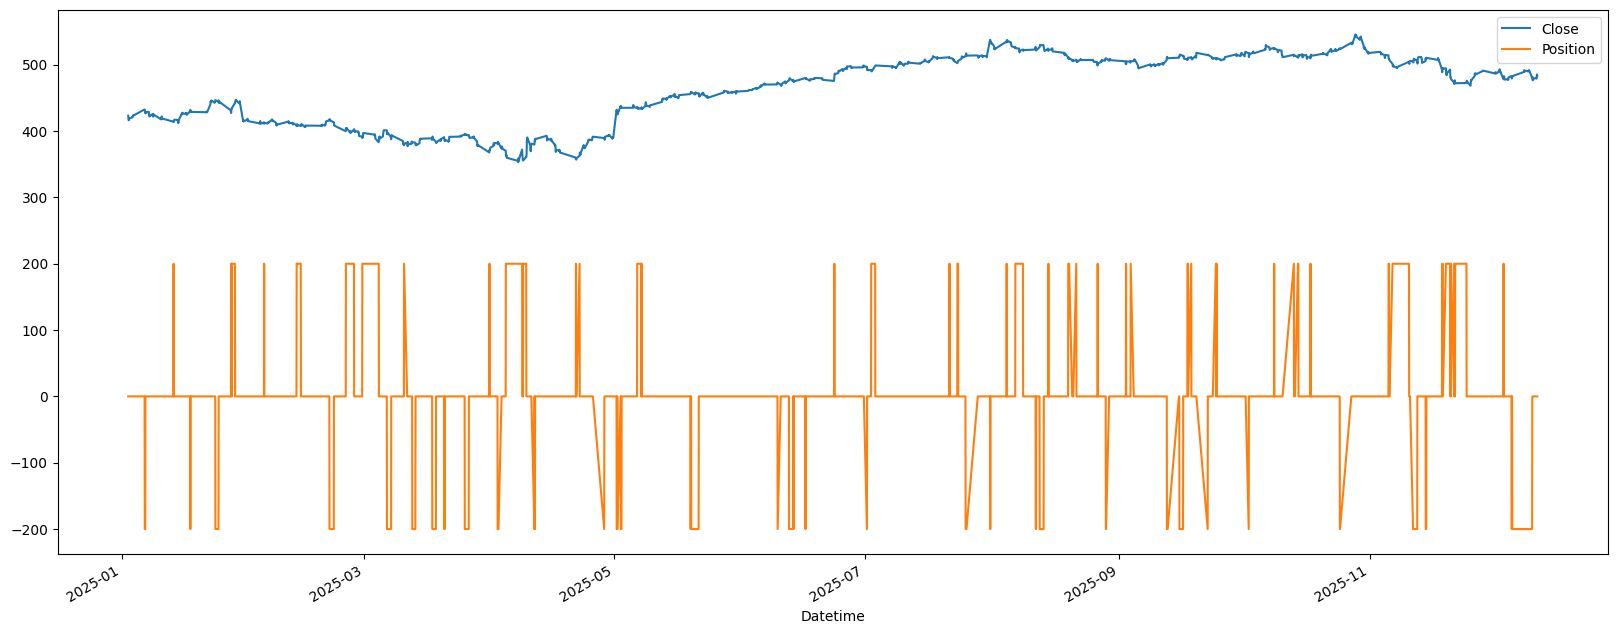

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np


def MFI_Strategy(stock,interval, start, end, boundary):
    df_1 = yf.download(stock, interval=interval, start=start, end=end)

    # Calculate using numpy arrays
    tp = (df_1['High'].values + df_1['Low'].values + df_1['Close'].values) / 3
    mf = tp * df_1['Volume'].values

    # Assign back to DataFrame
    df_1['TP'] = tp
    df_1['MF'] = mf

    # Continue with MFI calculation
    df_1['change_perc'] = df_1['Close'].pct_change()
    df_1['PMF'] = df_1['MF'].where(df_1['change_perc'] > 0, 0)
    df_1['NMF'] = df_1['MF'].where(df_1['change_perc'] < 0, 0)

    period = 14
    df_1['PMF_14'] = df_1['PMF'].rolling(window=period).sum()
    df_1['NMF_14'] = df_1['NMF'].rolling(window=period).sum()
    df_1['MR'] = df_1['PMF_14'] / df_1['NMF_14']
    df_1['MFI'] = 100 - (100 / (1 + df_1['MR']))
    df_1['MFI_signal'] = df_1['MFI'].shift(1)

    df=pd.DataFrame()
    df.index=df_1.index
    df['Long_Posi']=0
    df['Short_Posi']=0
    trigger=0
    df['Long_Posi'] = np.where(df_1['MFI_signal'] < (50-boundary), 200, 0)
    df['Short_Posi'] = np.where(df_1['MFI_signal'] > (50+boundary), -200, 0)
    df = df.dropna()

    df['Close']=df_1['Close']
    df['change_perc']=df_1['change_perc']
    df['Position']=df['Long_Posi']+df['Short_Posi']
    df['Strategy'] = df['change_perc'] * df['Position']
    df['Strategy']=df['Strategy']/200

    return_rst=df[['Strategy', 'change_perc']].sum().apply(np.exp)

    risk_rst=df[['Strategy','change_perc']].std()

#    df[['Close','Position']].plot(figsize=(20,8))
    strategy_ret = df['Strategy'].dropna()

    mean_ret = strategy_ret.mean()
    std_ret = strategy_ret.std()

    if std_ret == 0:
        sharpe = 0
    else:
        sharpe = mean_ret / std_ret * np.sqrt(252 * 6.5)

#    display(df)
 #   display(return_rst)
 #   display(risk_rst)

    return sharpe


def MFI_Strategy_visual(stock,interval, start, end, boundary):
    df_1 = yf.download(stock, interval=interval, start=start, end=end)

    # Calculate using numpy arrays
    tp = (df_1['High'].values + df_1['Low'].values + df_1['Close'].values) / 3
    mf = tp * df_1['Volume'].values

    # Assign back to DataFrame
    df_1['TP'] = tp
    df_1['MF'] = mf

    # Continue with MFI calculation
    df_1['change_perc'] = df_1['Close'].pct_change()
    df_1['PMF'] = df_1['MF'].where(df_1['change_perc'] > 0, 0)
    df_1['NMF'] = df_1['MF'].where(df_1['change_perc'] < 0, 0)

    period = 14
    df_1['PMF_14'] = df_1['PMF'].rolling(window=period).sum()
    df_1['NMF_14'] = df_1['NMF'].rolling(window=period).sum()
    df_1['MR'] = df_1['PMF_14'] / df_1['NMF_14']
    df_1['MFI'] = 100 - (100 / (1 + df_1['MR']))
    df_1['MFI_signal'] = df_1['MFI'].shift(1)
    df=pd.DataFrame()

    df=pd.DataFrame()
    df.index=df_1.index
    df['Long_Posi']=0
    df['Short_Posi']=0
    trigger=0
    df['Long_Posi'] = np.where(df_1['MFI_signal'] < (50-boundary),200,0)

    df['Short_Posi']=np.where(df_1['MFI_signal']>(50+boundary),-200,0)
    df['Close']=df_1['Close']
    df['change_perc']=df_1['change_perc']
    df['Position']=df['Long_Posi']+df['Short_Posi']
    df['Strategy'] = df['change_perc'] * df['Position']
    df['Strategy']=df['Strategy']/200

    return_rst=df[['Strategy', 'change_perc']].sum().apply(np.exp)

    risk_rst=df[['Strategy','change_perc']].std()

    df[['Close','Position']].plot(figsize=(20,8))
    strategy_ret = df['Strategy'].dropna()

    mean_ret = strategy_ret.mean()
    std_ret = strategy_ret.std()

    if std_ret == 0:
        sharpe = 0
    else:
        sharpe = (mean_ret / std_ret) * np.sqrt(252 * 6.5)

    display(df)
    display(return_rst)
    display(risk_rst)


# optimizeer
max_sr=1
for bdr in range (10,40):
    sharpe_rt=MFI_Strategy('MSFT','1h','2025-01-01','2025-12-12',bdr)
    if sharpe_rt > max_sr:
        max_sr=sharpe_rt
        final_bdr = bdr
# final visualization
sharpe_rt=MFI_Strategy_visual('MSFT','1h','2025-01-01','2025-12-12',final_bdr)

display(max_sr)
display(final_bdr)
#noted that boundary can ber converted into a percent of 100, which represent the relative importance of risk and return of that strategy, 0<=boundary<=50, with a higher value represent a high weight put on risk

# Further Adjustment

/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_87946/2735760763.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_1 = yf.download(stock, interval=interval, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_87946/2735760763.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_1 = yf.download(stock, interval=interval, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_87946/2735760763.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_1 = yf.download(stock, interval=interval, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_87946/2735760763.py:7: FutureWarning: YF.downlo

,Long_Posi,Short_Posi,Close,change_perc,Position,Strategy
Datetime,,,,,,
2025-01-02 14:30:00+00:00,0,0,13.360,NaN,0,NaN
2025-01-02 15:30:00+00:00,0,0,13.210,-0.011228,0,-0.0
2025-01-02 16:30:00+00:00,0,0,13.150,-0.004542,0,-0.0
2025-01-02 17:30:00+00:00,0,0,13.045,-0.007985,0,-0.0
2025-01-02 18:30:00+00:00,0,0,13.035,-0.000767,0,-0.0
...,...,...,...,...,...,...
2025-12-11 16:30:00+00:00,0,0,10.570,0.005231,0,0.0
2025-12-11 17:30:00+00:00,0,0,10.525,-0.004257,0,-0.0
2025-12-11 18:30:00+00:00,0,0,10.605,0.007601,0,0.0


Strategy       1.506460
change_perc    0.871303
dtype: float64

Strategy       0.003910
change_perc    0.009885
dtype: float64

np.float64(2.5705498456962315)

25

16

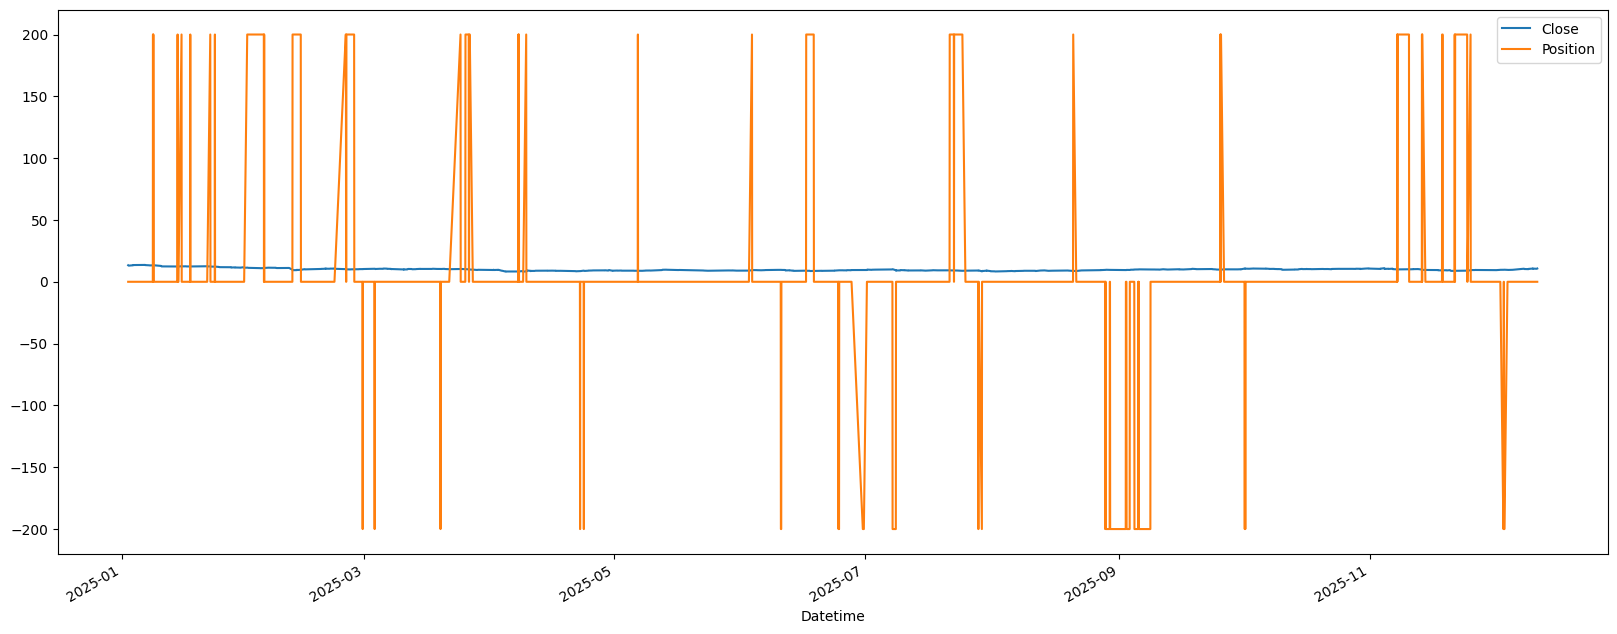

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np


def MFI_Strategy(stock,interval, start, end, boundary,period):
    df_1 = yf.download(stock, interval=interval, start=start, end=end)

    # Calculate using numpy arrays
    tp = (df_1['High'].values + df_1['Low'].values + df_1['Close'].values) / 3
    mf = tp * df_1['Volume'].values

    # Assign back to DataFrame
    df_1['TP'] = tp
    df_1['MF'] = mf

    # Continue with MFI calculation
    df_1['change_perc'] = df_1['Close'].pct_change()
    df_1['PMF'] = df_1['MF'].where(df_1['change_perc'] > 0, 0)
    df_1['NMF'] = df_1['MF'].where(df_1['change_perc'] < 0, 0)

    period = period
    df_1['PMF_14'] = df_1['PMF'].rolling(window=period).sum()
    df_1['NMF_14'] = df_1['NMF'].rolling(window=period).sum()
    df_1['MR'] = df_1['PMF_14'] / df_1['NMF_14']
    df_1['MFI'] = 100 - (100 / (1 + df_1['MR']))
    df_1['MFI_signal'] = df_1['MFI'].shift(1)

    df=pd.DataFrame()
    df.index=df_1.index
    df['Long_Posi']=0
    df['Short_Posi']=0
    trigger=0
    df['Long_Posi'] = np.where(df_1['MFI_signal'] < (50-boundary), 200, 0)
    df['Short_Posi'] = np.where(df_1['MFI_signal'] > (50+boundary), -200, 0)
    df = df.dropna()

    df['Close']=df_1['Close']
    df['change_perc']=df_1['change_perc']
    df['Position']=df['Long_Posi']+df['Short_Posi']
    df['Strategy'] = df['change_perc'] * df['Position']
    df['Strategy']=df['Strategy']/200

    return_rst=df[['Strategy', 'change_perc']].sum().apply(np.exp)

    risk_rst=df[['Strategy','change_perc']].std()

#    df[['Close','Position']].plot(figsize=(20,8))
    strategy_ret = df['Strategy'].dropna()

    mean_ret = strategy_ret.mean()
    std_ret = strategy_ret.std()

    if std_ret == 0:
        sharpe = 0
    else:
        sharpe = mean_ret / std_ret * np.sqrt(252 * 6.5)

#    display(df)
 #   display(return_rst)
 #   display(risk_rst)

    return sharpe


def MFI_Strategy_visual(stock,interval, start, end, boundary,period):
    df_1 = yf.download(stock, interval=interval, start=start, end=end)

    # Calculate using numpy arrays
    tp = (df_1['High'].values + df_1['Low'].values + df_1['Close'].values) / 3
    mf = tp * df_1['Volume'].values

    # Assign back to DataFrame
    df_1['TP'] = tp
    df_1['MF'] = mf

    # Continue with MFI calculation
    df_1['change_perc'] = df_1['Close'].pct_change()
    df_1['PMF'] = df_1['MF'].where(df_1['change_perc'] > 0, 0)
    df_1['NMF'] = df_1['MF'].where(df_1['change_perc'] < 0, 0)

    period = period
    df_1['PMF_14'] = df_1['PMF'].rolling(window=period).sum()
    df_1['NMF_14'] = df_1['NMF'].rolling(window=period).sum()
    df_1['MR'] = df_1['PMF_14'] / df_1['NMF_14']
    df_1['MFI'] = 100 - (100 / (1 + df_1['MR']))
    df_1['MFI_signal'] = df_1['MFI'].shift(1)
    df=pd.DataFrame()

    df=pd.DataFrame()
    df.index=df_1.index
    df['Long_Posi']=0
    df['Short_Posi']=0
    trigger=0
    df['Long_Posi'] = np.where(df_1['MFI_signal'] < (50-boundary),200,0)

    df['Short_Posi']=np.where(df_1['MFI_signal']>(50+boundary),-200,0)
    df['Close']=df_1['Close']
    df['change_perc']=df_1['change_perc']
    df['Position']=df['Long_Posi']+df['Short_Posi']
    df['Strategy'] = df['change_perc'] * df['Position']
    df['Strategy']=df['Strategy']/200

    return_rst=df[['Strategy', 'change_perc']].sum().apply(np.exp)

    risk_rst=df[['Strategy','change_perc']].std()

    df[['Close','Position']].plot(figsize=(20,8))
    strategy_ret = df['Strategy'].dropna()

    mean_ret = strategy_ret.mean()
    std_ret = strategy_ret.std()

    if std_ret == 0:
        sharpe = 0
    else:
        sharpe = (mean_ret / std_ret) * np.sqrt(252 * 6.5)

    display(df)
    display(return_rst)
    display(risk_rst)


# optimizer
max_sr=1
for bdr in range (10,40):
    for prd in range (10,70):
        sharpe_rt=MFI_Strategy('HLIT','1h','2025-01-01','2025-12-12',bdr,prd)
        if sharpe_rt > max_sr:
            max_sr=sharpe_rt
            final_bdr = bdr
            final_prd = prd
# final visualization
sharpe_rt=MFI_Strategy_visual('HLIT','1h','2025-01-01','2025-12-12',final_bdr,final_prd)

display(max_sr)
display(final_bdr)
display(final_prd)
#noted that boundary can ber converted into a percent of 100, which represent the relative importance of risk and return of that strategy, 0<=boundary<=50, with a higher value represent a high weight put on risk